Import libraries

In [ ]:
import tensorflow as tf
import numpy as np
import os
import distutils
import matplotlib.pyplot as plt
import sklearn

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import Model
from keras.optimizers import Adam, SGD, RMSprop, Nadam

from sklearn.metrics import confusion_matrix

from tensorflow.keras.layers import *
from tensorflow.keras.activations import *


In [ ]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split

lfw_people = fetch_lfw_people(min_faces_per_person=20, resize=0.5)

X = lfw_people.images
y = lfw_people.target
n_classes = lfw_people.target_names.shape[0]
print(n_classes)
height, width =  X.shape[1:]


# split into a training and testing set
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

x_train = np.float32(np.expand_dims(x_train, -1)/255)
x_test = np.float32(np.expand_dims(x_test, -1)/255)

# Convert y to one-hot
y_train = tf.keras.utils.to_categorical(y_train, n_classes)
y_test = tf.keras.utils.to_categorical(y_test, n_classes)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
print(np.amin(x_train),np.amax(x_train))


62
(2267, 62, 47) (756, 62, 47) (2267,) (756,)
(2267, 62, 47, 1) (756, 62, 47, 1) (2267, 62) (756, 62)
0.0 1.0


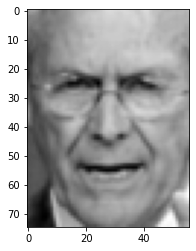

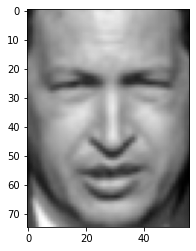

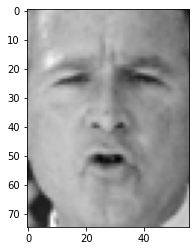

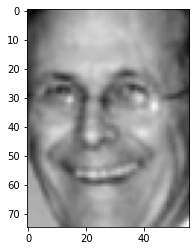

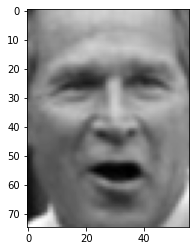

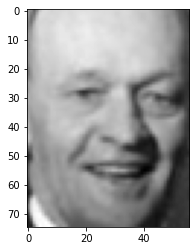

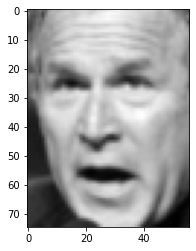

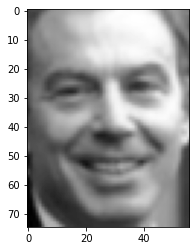

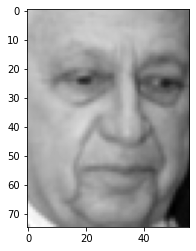

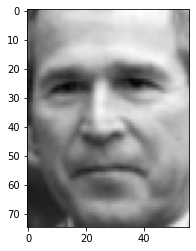

In [ ]:
r = np.random.randint(0,X_train.shape[0],size=10)
for i in r:
  plt.figure()
  plt.imshow(X_train[i],cmap='gray')

In [ ]:
def cnn_model(input_shape=(62,47,1)):
  model = tf.keras.models.Sequential()
  model.add(Conv2D(32, (3, 3), input_shape=input_shape))
  #model.add(Conv2D(32, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
 # model.add(Conv2D(64, (3, 3)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(62, activation='softmax'))
  return model

In [ ]:
model = cnn_model()
model.summary()
opt = Adam(learning_rate= 0.001)#RMSprop(lr=0.001)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_107 (Conv2D)          (None, 60, 45, 32)        320       
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 30, 22, 32)        0         
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 28, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 14, 10, 64)        0         
_________________________________________________________________
flatten_29 (Flatten)         (None, 8960)              0         
_________________________________________________________________
dense_58 (Dense)             (None, 128)               1147008   
_________________________________________________________________
dense_59 (Dense)             (None, 62)              

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs =  20, 
    validation_data=(x_test, y_test),
    batch_size=528, 
    verbose = 1,
)
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

Epoch 1/20
5/5 [==============================] - 0s 46ms/step - loss: 0.0998 - accuracy: 0.9912 - val_loss: 1.9895 - val_accuracy: 0.6481
Epoch 2/20
5/5 [==============================] - 0s 38ms/step - loss: 0.0929 - accuracy: 0.9938 - val_loss: 2.0162 - val_accuracy: 0.6561
Epoch 3/20
5/5 [==============================] - 0s 38ms/step - loss: 0.0825 - accuracy: 0.9943 - val_loss: 2.0757 - val_accuracy: 0.6349
Epoch 4/20
5/5 [==============================] - 0s 39ms/step - loss: 0.0755 - accuracy: 0.9965 - val_loss: 2.0173 - val_accuracy: 0.6548
Epoch 5/20
5/5 [==============================] - 0s 40ms/step - loss: 0.0655 - accuracy: 0.9960 - val_loss: 2.0585 - val_accuracy: 0.6481
Epoch 6/20
5/5 [==============================] - 0s 37ms/step - loss: 0.0588 - accuracy: 0.9978 - val_loss: 2.0648 - val_accuracy: 0.6548
Epoch 7/20
5/5 [==============================] - 0s 37ms/step - loss: 0.0543 - accuracy: 0.9987 - val_loss: 2.0866 - val_accuracy: 0.6534
Epoch 8/20
5/5 [===========

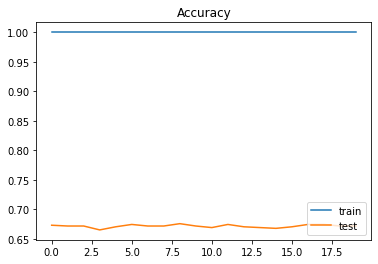

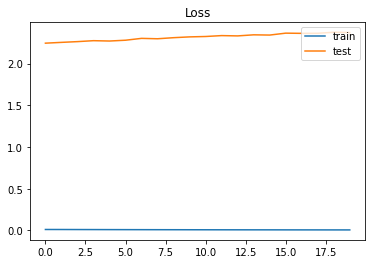

In [ ]:
fig, ax = plt.subplots()
ax.plot(accuracy,label = 'train')
ax.plot(val_accuracy,label = 'test')
ax.set_title('Accuracy')
ax.legend(loc='lower right')
fig, ax = plt.subplots()
ax.plot(loss,label = 'train')
ax.plot(val_loss,label = 'test')
ax.set_title('Loss')
ax.legend(loc='upper right')